In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
import os
import glob

# Set the path to the directory containing the CSV files
path = "./源数据/"

# Use glob to get a list of all CSV files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Combine all files in the list into a single DataFrame
df = pd.concat((pd.read_csv(f) for f in all_files))



In [4]:
# Write the combined DataFrame to a new CSV file
df.to_csv("业绩报表.csv", index=False)

In [12]:
df = pd.read_csv('./业绩报表.csv')
df = df.drop_duplicates(subset=['股票代码','股票简称','最新公告日期'])
df = df.sort_values(by = ['股票代码','最新公告日期'])
df.replace("None", 0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

C:\Users\26511\AppData\Local\Temp\ipykernel_14364\3961873218.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./业绩报表.csv')


,股票代码,股票简称,最新公告日期,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1,利润分配,所处行业
0,1,平安银行,2015-04-24 00:00:00,0.37,16100000000,5054000000.0,4.41,49.0464728754,40.8191696851,12.320463568531,4.38,0,8.4613,42.9703,0,银行
1,1,平安银行,2016-04-21 00:00:00,0.41,20671000000,5629000000.0,4.21,28.3913043478,11.3771270281,11.965449358497,0.84,0,10.2101,37.0253,0,银行
2,1,平安银行,2017-04-22 00:00:00,0.35,27532000000,6086000000,3.7,33.1914276039,8.1186711672,11.714291271374,3.45,0,10.0796,47.5394,0,银行
3,1,平安银行,2018-04-20 00:00:00,0.31,27726000000,6214000000.0,2.89,0.6537846869,2.1031876438,10.936604604118,-6.7,0,7.632,60.1546,0,银行
4,1,平安银行,2019-04-24 00:00:00,0.33,28026000000,6595000000.0,2.79,1.0820168795,6.1313163824,11.848172746917,2.41,0,7.9875,63.4044,0,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,900957,凌云B股,2019-04-25 00:00:00,0.024,31308995.96,8442757.63,1.86,37.613869899,58.5426471833,1.236523596877,0.001082456963,47.1421032117,40.3432,-28.4503,0,电力行业
39018,900957,凌云B股,2020-04-29 00:00:00,0.021,26297040.35,7448464.95,1.64,-16.008036848,-11.7768710601,1.313047551605,-0.00444845212,45.3848785687,25.1804,-11.5827,0,电力行业
39019,900957,凌云B股,2021-04-27 00:00:00,0.006,23763129.34,2157154.99,0.45,-9.6357269726,-71.04,1.370370422378,0.026581998625,33.3783095505,-5.6947,-76.4593,0,电力行业
39020,900957,凌云B股,2022-04-30 00:00:00,0.024,27886218.46,8359112.84,1.66,17.3507834806,287.51,1.450630764183,-0.004080305759,53.1629555698,40.7772,66.4292,0,电力行业


In [ ]:
df['最新公告日期'] = pd.to_datetime(df['最新公告日期'])

In [14]:
df['最新公告日期'] = df['最新公告日期'].dt.year
df

,股票代码,股票简称,最新公告日期,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1,利润分配,所处行业
0,1,平安银行,2015,0.37,16100000000,5054000000.0,4.41,49.0464728754,40.8191696851,12.320463568531,4.38,0,8.4613,42.9703,0,银行
1,1,平安银行,2016,0.41,20671000000,5629000000.0,4.21,28.3913043478,11.3771270281,11.965449358497,0.84,0,10.2101,37.0253,0,银行
2,1,平安银行,2017,0.35,27532000000,6086000000,3.7,33.1914276039,8.1186711672,11.714291271374,3.45,0,10.0796,47.5394,0,银行
3,1,平安银行,2018,0.31,27726000000,6214000000.0,2.89,0.6537846869,2.1031876438,10.936604604118,-6.7,0,7.632,60.1546,0,银行
4,1,平安银行,2019,0.33,28026000000,6595000000.0,2.79,1.0820168795,6.1313163824,11.848172746917,2.41,0,7.9875,63.4044,0,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39017,900957,凌云B股,2019,0.024,31308995.96,8442757.63,1.86,37.613869899,58.5426471833,1.236523596877,0.001082456963,47.1421032117,40.3432,-28.4503,0,电力行业
39018,900957,凌云B股,2020,0.021,26297040.35,7448464.95,1.64,-16.008036848,-11.7768710601,1.313047551605,-0.00444845212,45.3848785687,25.1804,-11.5827,0,电力行业
39019,900957,凌云B股,2021,0.006,23763129.34,2157154.99,0.45,-9.6357269726,-71.04,1.370370422378,0.026581998625,33.3783095505,-5.6947,-76.4593,0,电力行业
39020,900957,凌云B股,2022,0.024,27886218.46,8359112.84,1.66,17.3507834806,287.51,1.450630764183,-0.004080305759,53.1629555698,40.7772,66.4292,0,电力行业


In [26]:
df['股票代码'] = df['股票代码'].astype(str)
mask = (df['股票简称'].str.contains('B|ST|st|')) &(df['股票代码'].str.startswith('688|300|301|43|83|87|88'))
df = df[~mask]
df = df.reset_index(drop  =True)
df

,股票代码,股票简称,最新公告日期,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),同比增长(%).1,每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),季度环比增长(%).1,利润分配,所处行业
0,1,平安银行,2015,0.37,16100000000,5054000000.0,4.41,49.0464728754,40.8191696851,12.320463568531,4.38,0,8.4613,42.9703,0,银行
1,1,平安银行,2016,0.41,20671000000,5629000000.0,4.21,28.3913043478,11.3771270281,11.965449358497,0.84,0,10.2101,37.0253,0,银行
2,1,平安银行,2017,0.35,27532000000,6086000000,3.7,33.1914276039,8.1186711672,11.714291271374,3.45,0,10.0796,47.5394,0,银行
3,1,平安银行,2018,0.31,27726000000,6214000000.0,2.89,0.6537846869,2.1031876438,10.936604604118,-6.7,0,7.632,60.1546,0,银行
4,1,平安银行,2019,0.33,28026000000,6595000000.0,2.79,1.0820168795,6.1313163824,11.848172746917,2.41,0,7.9875,63.4044,0,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,605589,圣泉集团,2023,0.16,2226248064.81,125483616.25,1.57,16.5260837939,-21.81,10.418594643541,-1.064827769443,21.284540661,-9.6345,-22.3143,0,化学制品
30326,605598,上海港湾,2022,0.32,179562959.66,41308775.97,0,0,0,0,0,28.5703044253,-39.1641,-21.3666,0,工程建设
30327,605598,上海港湾,2023,0.61,243448078,105206990.53,7.89,35.5781161443,154.68,8.710901498752,1.167310493311,60.9645038315,66.4467,1970.6799,0,工程建设
30328,605599,菜百股份,2022,0.15,2951667217.87,104731364.83,0,0,0,0,0,11.89389865,35.0358,6.0041,0,珠宝首饰


In [29]:
df = df.drop(columns = ['同比增长(%).1','季度环比增长(%).1','利润分配'])
df = df.rename(columns = {'最新公告日期':'年份'})
df

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业
0,1,平安银行,2015,0.37,16100000000,5054000000.0,4.41,49.0464728754,12.320463568531,4.38,0,8.4613,银行
1,1,平安银行,2016,0.41,20671000000,5629000000.0,4.21,28.3913043478,11.965449358497,0.84,0,10.2101,银行
2,1,平安银行,2017,0.35,27532000000,6086000000,3.7,33.1914276039,11.714291271374,3.45,0,10.0796,银行
3,1,平安银行,2018,0.31,27726000000,6214000000.0,2.89,0.6537846869,10.936604604118,-6.7,0,7.632,银行
4,1,平安银行,2019,0.33,28026000000,6595000000.0,2.79,1.0820168795,11.848172746917,2.41,0,7.9875,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,605589,圣泉集团,2023,0.16,2226248064.81,125483616.25,1.57,16.5260837939,10.418594643541,-1.064827769443,21.284540661,-9.6345,化学制品
30326,605598,上海港湾,2022,0.32,179562959.66,41308775.97,0,0,0,0,28.5703044253,-39.1641,工程建设
30327,605598,上海港湾,2023,0.61,243448078,105206990.53,7.89,35.5781161443,8.710901498752,1.167310493311,60.9645038315,66.4467,工程建设
30328,605599,菜百股份,2022,0.15,2951667217.87,104731364.83,0,0,0,0,11.89389865,35.0358,珠宝首饰


In [30]:
df.to_csv('./业绩报表(处理后).csv',index = False)

In [31]:
df1 = pd.read_csv('./业绩报表(处理后).csv')
df1

,股票代码,股票简称,年份,每股收益(元),营业总收入(元),净利润(元),净资产收益率(%),同比增长(%),每股净资产(元),每股经营现金流量(元),销售毛利率(%),季度环比增长(%),所处行业
0,1,平安银行,2015,0.37,1.610000e+10,5.054000e+09,4.41,49.046473,12.320464,4.380000,0.000000,8.4613,银行
1,1,平安银行,2016,0.41,2.067100e+10,5.629000e+09,4.21,28.391304,11.965449,0.840000,0.000000,10.2101,银行
2,1,平安银行,2017,0.35,2.753200e+10,6.086000e+09,3.70,33.191428,11.714291,3.450000,0.000000,10.0796,银行
3,1,平安银行,2018,0.31,2.772600e+10,6.214000e+09,2.89,0.653785,10.936605,-6.700000,0.000000,7.6320,银行
4,1,平安银行,2019,0.33,2.802600e+10,6.595000e+09,2.79,1.082017,11.848173,2.410000,0.000000,7.9875,银行
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,605589,圣泉集团,2023,0.16,2.226248e+09,1.254836e+08,1.57,16.526084,10.418595,-1.064828,21.284541,-9.6345,化学制品
30326,605598,上海港湾,2022,0.32,1.795630e+08,4.130878e+07,0.00,0.000000,0.000000,0.000000,28.570304,-39.1641,工程建设
30327,605598,上海港湾,2023,0.61,2.434481e+08,1.052070e+08,7.89,35.578116,8.710901,1.167310,60.964504,66.4467,工程建设
30328,605599,菜百股份,2022,0.15,2.951667e+09,1.047314e+08,0.00,0.000000,0.000000,0.000000,11.893899,35.0358,珠宝首饰


## 词云图绘制
使用所处行业的字段绘制词云图，词云图中字体大的表示行业的公司数量在市场中占比大。

In [39]:
hangye = pd.DataFrame(df1['所处行业'])
hangye = hangye['所处行业'].unique()

In [42]:
hangye = pd.DataFrame(hangye)

In [44]:
hangye.to_csv('./所处行业.txt', sep='\t', index=False)

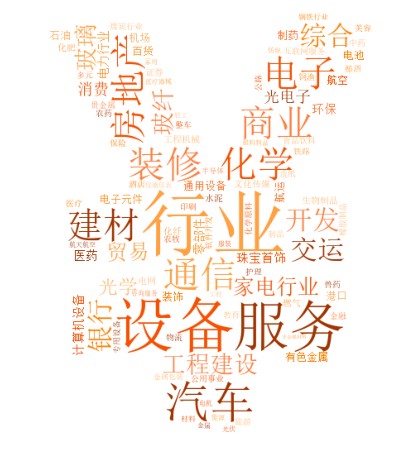

In [45]:
# -*- coding: UTF-8 -*-
# 导入相应的库
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import colors
from PIL import Image
import numpy as np
 
 
# 导入文本数据进行简单的文本处理，去掉换行符，半角和全角空格
text=open("./所处行业.txt",encoding='utf8').read()
text=text.replace('\n',"").replace("\u3000","").replace("\u0020","")
 
# 分词，返回结果为词的列表
text_cut=jieba.cut(text)
# 将分好的词用某个符号分割开连成字符串
text_cut=" ".join(text_cut)
 
# 导入停词,用于去掉文本中类似于'啊'、'你'，'我'之类的词
stop_words=open("./stop_words_zh.txt",encoding="utf8").read().split("\n")
 
#导入背景图，注意背景图除了目标形状外，其余地方都应是空白的
background_image=np.array(Image.open("./背景.jpg"))
 
#设置词云中字体颜色可选择的范围
color_list=['#A23400','#F75000','#FF8040',"#FF8000","#FFA042",'#FFBB77']
colormap=colors.ListedColormap(color_list)
 
 
# 使用WordCloud生成词云
word_cloud=WordCloud(font_path="simsun.ttc",  # 设置词云字体
                       background_color="white",width=1000,height=880, # 词云图的背景颜色、高度和宽度
                       mask=background_image, # 指定词云的形状
                       max_words=100,
                       colormap=colormap,
                       stopwords=stop_words) # 去掉的停词
word_cloud.generate(text_cut)
 
 
# 运用matplotlib展现结果
plt.subplots(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()